In [1]:
import pandas as pd
from prophet import Prophet
import os
import openpyxl
os.getcwd()

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'c:\\Users\\Admin\\AppData\\Local\\Programs\\Microsoft VS Code'

In [2]:
os.chdir('D:/Rprojects/myprojects/marsho/new_analytics')
df2 = pd.read_excel('tidydata_with_NA2.xlsx')


In [3]:
fitr = pd.DataFrame({
  'holiday' :'fitr',
  'ds' : pd.to_datetime(['2020-06-04', '2020-06-05', '2021-05-13', 
                         '2021-05-14','2022-05-03','2022-05-04',
                       '2023-04-22','2023-04-23']),
  'lower_window' : 0,
  'upper_window' : 1
})

ashoora = pd.DataFrame({
  'holiday' :'ashoora',
  'ds' : pd.to_datetime(['2020-09-07', '2020-09-08','2021-08-18',
                         '2021-08-19','2022-08-07','2022-08-08',
                         '2023-07-27','2023-07-28']),
  'lower_window' : 0,
  'upper_window' : 1
})

nowrouz = pd.DataFrame({
  'holiday' :'nowrouz',
  'ds' : pd.to_datetime(['2020-03-20','2020-03-21','2020-03-22',
                          '2020-03-23','2020-03-24','2020-03-25',
                         '2020-03-26','2020-03-27','2020-03-28',
                         '2021-03-21','2021-03-22','2021-03-23',
                         '2021-03-24','2021-03-25','2021-03-26',
                         '2021-03-27','2021-03-28','2021-03-29',
                         '2022-03-21','2022-03-22','2022-03-23',
                         '2022-03-24','2022-03-25','2022-03-26',
                         '2022-03-27','2022-03-28','2022-03-29',
                         '2023-03-21','2023-03-22','2023-03-23',
                         '2023-03-24','2023-03-25','2023-03-26',
                        '2023-03-27','2023-03-28','2023-03-29']),
  'lower_window' : 0,
  'upper_window' : 1
})

long_weekend = pd.DataFrame({
  'holiday' :'long_weekend',
  'ds' : pd.to_datetime([
      '2021-06-04','2021-06-05','2021-06-06',
      '2021-07-29','2021-07-30','2021-10-22',
      '2021-10-23','2021-10-24','2022-03-18',
      '2022-03-19','2022-03-20','2022-06-03',
      '2022-06-03','2022-06-05','2023-06-04',
      '2023-06-05','2023-09-06','2023-09-07',
      '2023-09-08','2023-09-14', '2023-09-15',
      '2023-09-16','2023-09-22','2023-09-23',
      '2023-09-24']),
  'lower_window' : 0,
  'upper_window' : 1
})



In [4]:
holidays = pd.concat((fitr , ashoora , nowrouz,long_weekend ))
holidays

,holiday,ds,lower_window,upper_window
0,fitr,2020-06-04,0,1
1,fitr,2020-06-05,0,1
2,fitr,2021-05-13,0,1
3,fitr,2021-05-14,0,1
4,fitr,2022-05-03,0,1
...,...,...,...,...
20,long_weekend,2023-09-15,0,1
21,long_weekend,2023-09-16,0,1
22,long_weekend,2023-09-22,0,1
23,long_weekend,2023-09-23,0,1


In [5]:
holidays.tail(6)

,holiday,ds,lower_window,upper_window
19,long_weekend,2023-09-14,0,1
20,long_weekend,2023-09-15,0,1
21,long_weekend,2023-09-16,0,1
22,long_weekend,2023-09-22,0,1
23,long_weekend,2023-09-23,0,1
24,long_weekend,2023-09-24,0,1


In [6]:
df2 = df2.rename(columns={'date':'ds', 'keybab_pan':'y'})
df2 = df2[['ds','y']]

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1096 non-null   datetime64[ns]
 1   y       1089 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.3 KB


In [8]:
# Assuming your DataFrame is named df
# Calculate the index to split the DataFrame
split_index = int(0.8 * len(df2))

# Split the DataFrame
df_sampled = df2.iloc[:split_index, :]
df_remaining = df2.iloc[split_index:, :]

In [9]:
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      876 non-null    datetime64[ns]
 1   y       869 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.8 KB


In [10]:
m = Prophet(holidays=holidays)
m.fit(df_sampled)
future = m.make_future_dataframe(periods = 365)


10:54:33 - cmdstanpy - INFO - Chain [1] start processing
10:54:34 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
m = Prophet(holidays=holidays)
forecast = m.fit(df_sampled).predict(future)

11:23:29 - cmdstanpy - INFO - Chain [1] start processing
11:23:29 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
df_sampled = df_sampled.fillna(df_sampled.mean())

In [20]:
forecast[(forecast['ashoora'] + forecast['nowrouz'] + forecast['fitr'] + forecast['long_weekend']).abs()>0] [
    ['ds','ashoora','nowrouz','fitr','long_weekend']][-10:]

,ds,ashoora,nowrouz,fitr,long_weekend
1098,2023-03-30,0.000000,13.02784,0.000000,0.000000
1121,2023-04-22,0.000000,0.00000,16.603440,0.000000
1122,2023-04-23,0.000000,0.00000,16.648019,0.000000
1123,2023-04-24,0.000000,0.00000,0.044579,0.000000
1164,2023-06-04,0.000000,0.00000,0.000000,8.084440
1165,2023-06-05,0.000000,0.00000,0.000000,10.187415
1166,2023-06-06,0.000000,0.00000,0.000000,2.102975
1217,2023-07-27,2.045435,0.00000,0.000000,0.000000
1218,2023-07-28,-2.191091,0.00000,0.000000,0.000000
1219,2023-07-29,-4.236526,0.00000,0.000000,0.000000


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series cont

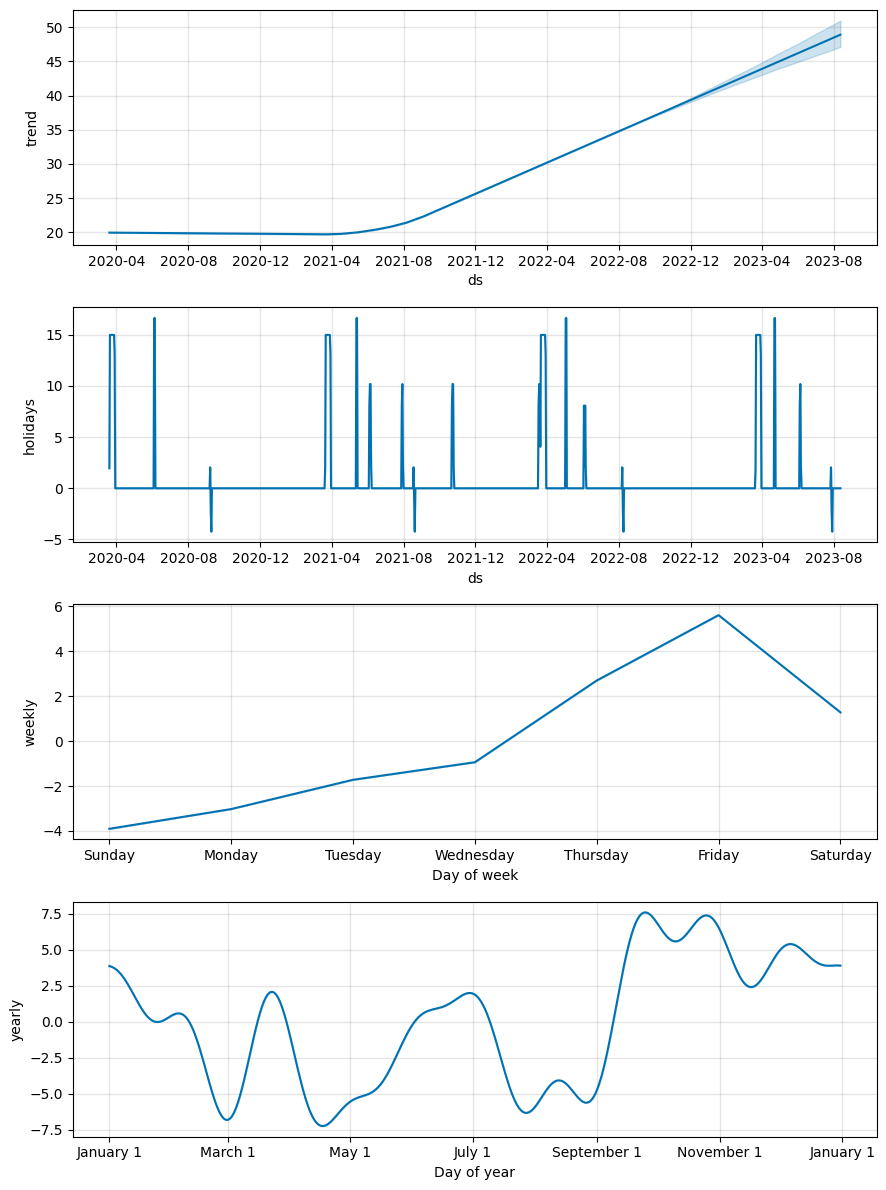

In [21]:
fig = m.plot_components(forecast)

In [23]:
df_filtered = forecast[(forecast['ds'] >= '2022-08-12') & (forecast['ds'] <= '2023-08-12')]
df_filtered

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,ashoora,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
868,2022-08-12,35.186964,24.937281,48.625076,35.186964,35.186964,1.508226,1.508226,1.508226,0.0,...,5.608095,5.608095,5.608095,-4.099869,-4.099869,-4.099869,0.0,0.0,0.0,36.695189
869,2022-08-13,35.224539,20.750951,44.632355,35.224539,35.224539,-2.797342,-2.797342,-2.797342,0.0,...,1.280993,1.280993,1.280993,-4.078335,-4.078335,-4.078335,0.0,0.0,0.0,32.427197
870,2022-08-14,35.262114,14.849005,38.411493,35.262114,35.262114,-7.997773,-7.997773,-7.997773,0.0,...,-3.902777,-3.902777,-3.902777,-4.094996,-4.094996,-4.094996,0.0,0.0,0.0,27.264340
871,2022-08-15,35.299689,16.300160,40.712058,35.299689,35.299689,-7.172228,-7.172228,-7.172228,0.0,...,-3.023663,-3.023663,-3.023663,-4.148565,-4.148565,-4.148565,0.0,0.0,0.0,28.127461
872,2022-08-16,35.337264,17.264652,41.525295,35.337264,35.337264,-5.957084,-5.957084,-5.957084,0.0,...,-1.720733,-1.720733,-1.720733,-4.236351,-4.236351,-4.236351,0.0,0.0,0.0,29.380180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,2023-08-08,48.751543,30.580195,53.747280,46.986058,50.762991,-6.309120,-6.309120,-6.309120,0.0,...,-1.720733,-1.720733,-1.720733,-4.588387,-4.588387,-4.588387,0.0,0.0,0.0,42.442423
1230,2023-08-09,48.789118,31.622320,55.925015,47.018917,50.815134,-5.361709,-5.361709,-5.361709,0.0,...,-0.939174,-0.939174,-0.939174,-4.422534,-4.422534,-4.422534,0.0,0.0,0.0,43.427410
1231,2023-08-10,48.826693,34.885509,59.818343,47.051777,50.859332,-1.587727,-1.587727,-1.587727,0.0,...,2.697259,2.697259,2.697259,-4.284985,-4.284985,-4.284985,0.0,0.0,0.0,47.238967
1232,2023-08-11,48.864268,37.717971,62.360042,47.083327,50.902773,1.427943,1.427943,1.427943,0.0,...,5.608095,5.608095,5.608095,-4.180152,-4.180152,-4.180152,0.0,0.0,0.0,50.292211


In [24]:
excel_file_path = 'D:\\Rprojects\\myprojects\\marsho\\new_analytics\\file2.xlsx'

In [25]:
df_filtered.to_excel(excel_file_path, index=False)